In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read training and testing data
train_data=pd.read_csv('train_fwYjLYX.csv')
test_data=pd.read_csv('test_1eLl9Yf.csv')

In [3]:
#See top 5 records of train data
train_data.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [4]:
#See top 5 records of test data
test_data.head()

,id,application_date,segment
0,1,2019-07-06,1
1,2,2019-07-07,1
2,3,2019-07-08,1
3,4,2019-07-09,1
4,5,2019-07-10,1


In [5]:
#Types of training data
train_data.dtypes

application_date     object
segment               int64
branch_id           float64
state                object
zone                 object
case_count          float64
dtype: object

In [6]:
#Types of testing data
test_data.dtypes

id                   int64
application_date    object
segment              int64
dtype: object

In [7]:
#Size of training data
train_data.shape

(80402, 6)

In [8]:
#Size of test data
test_data.shape

(180, 3)

In [9]:
#Change date format in both training and testing data
train_data['application_date']=pd.to_datetime(train_data.application_date,format='%Y-%m-%d')
test_data['application_date']=pd.to_datetime(test_data.application_date,format='%Y-%m-%d')

In [10]:
#Get year,month and day separately for training data
for i in (train_data,test_data):
    i['year']=i.application_date.dt.year
    i['month']=i.application_date.dt.month
    i['day']=i.application_date.dt.day

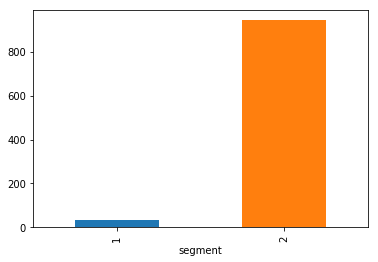

In [11]:
#Segment wise case counts
train_data.groupby(['segment'])['case_count'].mean().plot.bar()

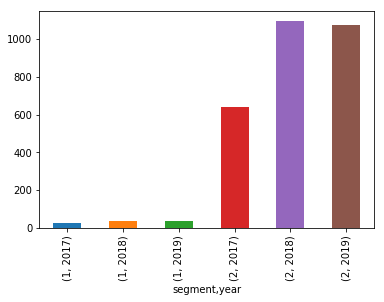

In [12]:
#Segment year wise case count
train_data.groupby(['segment','year'])['case_count'].mean().plot.bar()

In [13]:
#Split data by segment wise
train_segment1=train_data[train_data['segment']==1]
train_segment2=train_data[train_data['segment']==2]

In [14]:
#Check top 5 records of segment 1
train_segment1.head()

,application_date,segment,branch_id,state,zone,case_count,year,month,day
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,2017,4,1
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,2017,4,3
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,2017,4,4
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,2017,4,5
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,2017,4,7


In [15]:
#Check top 5 records of segment 2
train_segment2.head()

,application_date,segment,branch_id,state,zone,case_count,year,month,day
66898,2017-04-01,2,NaN,ASSAM,NaN,0.0,2017,4,1
66899,2017-04-02,2,NaN,ASSAM,NaN,0.0,2017,4,2
66900,2017-04-03,2,NaN,ASSAM,NaN,0.0,2017,4,3
66901,2017-04-04,2,NaN,ASSAM,NaN,0.0,2017,4,4
66902,2017-04-05,2,NaN,ASSAM,NaN,0.0,2017,4,5


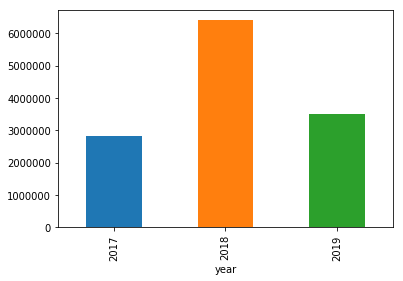

In [73]:
#segment 2 year wise case count
train_segment2.groupby(['year'])['case_count'].sum().plot.bar()

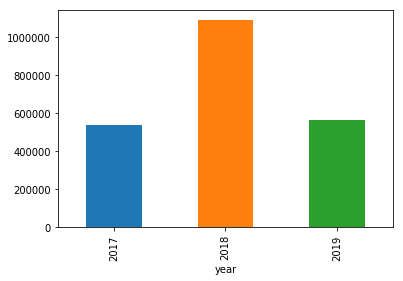

In [72]:
#Segment 1 year wise case count
train_segment1.groupby(['year'])['case_count'].sum().plot.bar()

In [71]:
# state,year,segment wise case count
train_data.groupby(['state','year','segment'])['case_count'].sum().to_csv('statewise_segment_year_count.csv')

In [68]:
#application date wise case count
train_1=train_segment1.groupby(['application_date'])['case_count'].sum()
train_2=train_segment2.groupby(['application_date'])['case_count'].sum()

In [69]:
# reset index
train_1=train_1.reset_index()
train_2=train_2.reset_index()

In [70]:
print(train_1.head())
print(train_2.head())

  application_date  case_count
0       2017-04-01       299.0
1       2017-04-03        42.0
2       2017-04-04        23.0
3       2017-04-05      1530.0
4       2017-04-07      1341.0
  application_date  case_count
0       2017-04-01       897.0
1       2017-04-02       605.0
2       2017-04-03      2016.0
3       2017-04-04      2245.0
4       2017-04-05      2415.0


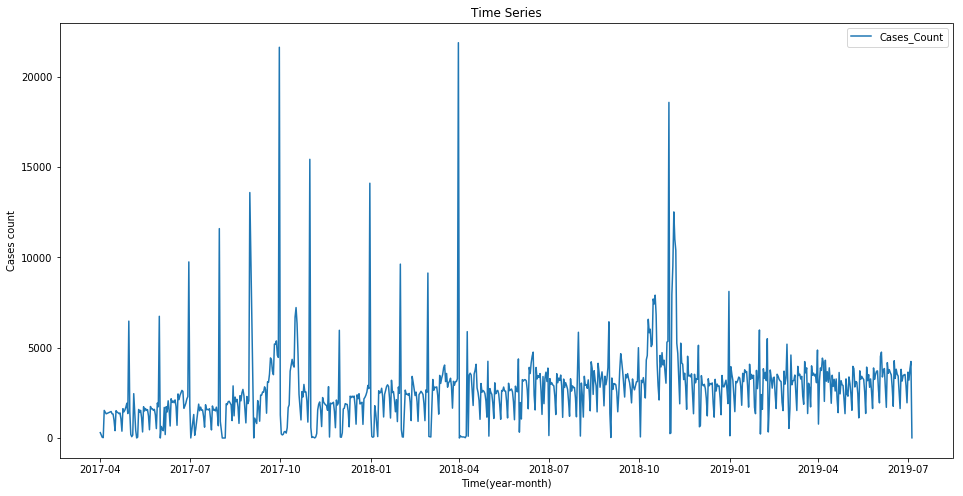

In [74]:
#Plot the time series data
train_1.index=train_1['application_date']
plt.figure(figsize=(16,8)) 
plt.plot(train_1['case_count'],label='Cases_Count')
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Cases count") 
plt.legend(loc='best')

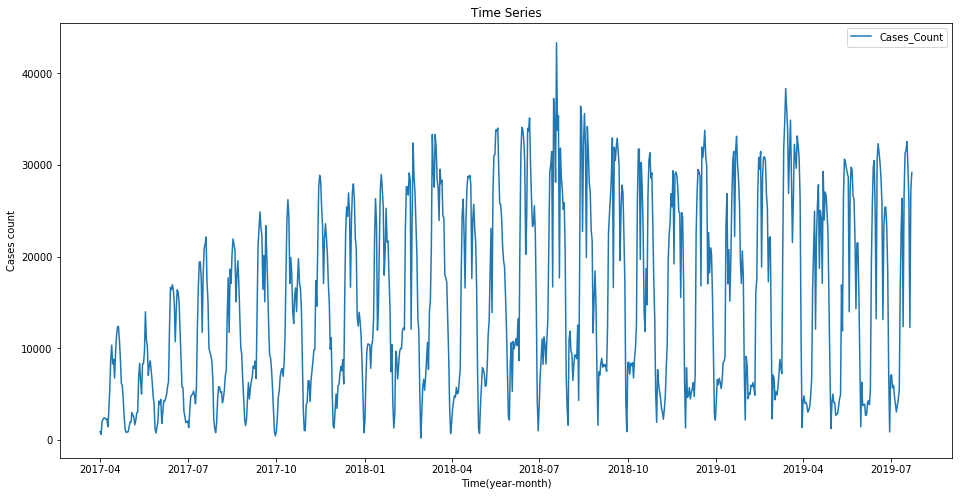

In [75]:
#Plot the time series data
train_2.index=train_2['application_date']
plt.figure(figsize=(16,8)) 
plt.plot(train_2['case_count'],label='Cases_Count')
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Cases count") 
plt.legend(loc='best')

In [76]:
train_1.count()

application_date    806
case_count          806
dtype: int64

In [77]:
#Split data into train_2.count()

application_date    844
case_count          844
dtype: int64

In [78]:
# Split data into training and validation
train_seg1=train_1.iloc[0:643]
val_seg1=train_1.iloc[643:]

In [79]:
train_seg1.tail()

,application_date,case_count
application_date,,
2019-01-19,2019-01-19,2847.0
2019-01-20,2019-01-20,1712.0
2019-01-21,2019-01-21,4085.0
2019-01-22,2019-01-22,3250.0
2019-01-23,2019-01-23,3522.0


In [59]:
val_seg1.head()

,application_date,case_count
application_date,,
2019-01-24,2019-01-24,39.867470
2019-01-25,2019-01-25,41.843373
2019-01-26,2019-01-26,20.433735
2019-01-27,2019-01-27,16.253012
2019-01-28,2019-01-28,45.132530


In [60]:
#Split data into training and validation
train_seg2=train_2.iloc[0:674]
val_seg2=train_2.iloc[674:]

In [61]:
train_seg2.tail()

,application_date,case_count
application_date,,
2019-01-30,2019-01-30,476.6875
2019-01-31,2019-01-31,136.0625
2019-02-01,2019-02-01,570.6250
2019-02-02,2019-02-02,506.0000
2019-02-03,2019-02-03,280.1250


In [62]:
val_seg2.head()

,application_date,case_count
application_date,,
2019-02-04,2019-02-04,318.8125
2019-02-05,2019-02-05,311.6875
2019-02-06,2019-02-06,372.3125
2019-02-07,2019-02-07,364.0625
2019-02-08,2019-02-08,390.6875


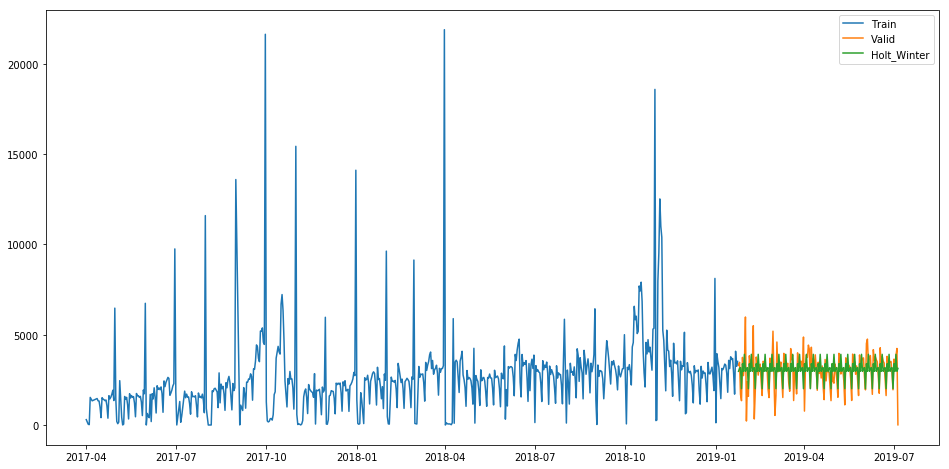

In [113]:
#Apply holt winter on segment 1 data
from statsmodels.tsa.api import ExponentialSmoothing
y_hat_avg_seg1=val_seg1.copy()
fit1=ExponentialSmoothing(np.asarray(train_seg1['case_count']),seasonal_periods=7,trend=None,seasonal="mul",).fit()
y_hat_avg_seg1['Holt_Winter']=fit1.forecast(len(val_seg1))
plt.figure(figsize=(16,8)) 
plt.plot(train_seg1['case_count'], label='Train') 
plt.plot(val_seg1['case_count'], label='Valid') 
plt.plot(y_hat_avg_seg1['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [84]:
#MAPE function
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [114]:
#mape of segment 1
mape1=mean_absolute_percentage_error(val_seg1.case_count,y_hat_avg_seg1.Holt_Winter)

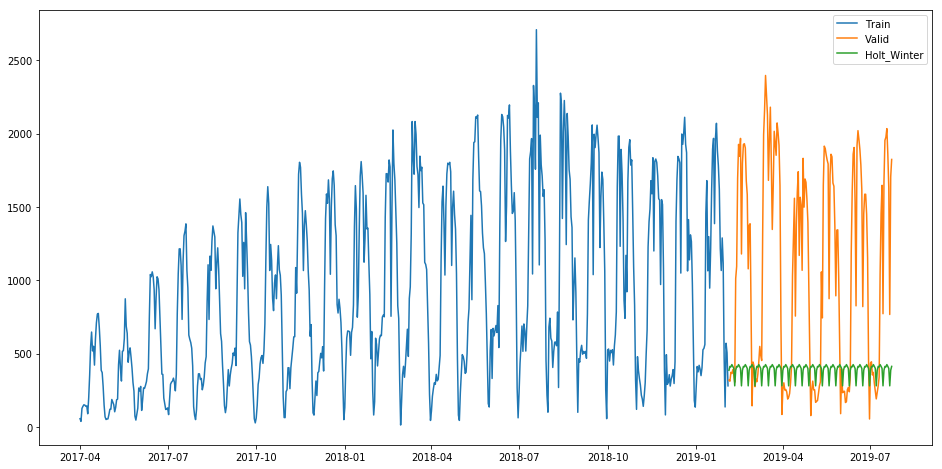

In [116]:
#Holt winter on segment 2 
from statsmodels.tsa.api import ExponentialSmoothing
y_hat_avg_seg2=val_seg2.copy()
fit2=ExponentialSmoothing(np.asarray(train_seg2['case_count']),seasonal_periods=7,trend=None,seasonal='multiplicative',).fit()
y_hat_avg_seg2['Holt_Winter']=fit2.forecast(len(val_seg2))
plt.figure(figsize=(16,8)) 
plt.plot(train_seg2['case_count'], label='Train') 
plt.plot(val_seg2['case_count'], label='Valid') 
plt.plot(y_hat_avg_seg2['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [117]:
#mape of segment 2
mape2=mean_absolute_percentage_error(val_seg2.case_count,y_hat_avg_seg2.Holt_Winter)

In [118]:
#Final score 
final_score=(0.5*mape1)+(0.5*mape2)
final_score

126.55535555669067

In [130]:
#Test data split segment 1 and segment 2
test_segment1=test_data[test_data['segment']==1]
test_segment2=test_data[test_data['segment']==2]
# Forecast segment 1 and segment 2
test_segment1['case_count']=fit1.forecast(len(test_segment1))
test_segment2['case_count']=fit2.forecast(len(test_segment2))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [131]:
test_segment1.head()

,id,application_date,segment,year,month,day,case_count
0,1,2019-07-06,1,2019,7,6,2975.746633
1,2,2019-07-07,1,2019,7,7,3136.203190
2,3,2019-07-08,1,2019,7,8,3177.185130
3,4,2019-07-09,1,2019,7,9,2012.848761
4,5,2019-07-10,1,2019,7,10,3395.155453


In [132]:
test_segment2.head()

,id,application_date,segment,year,month,day,case_count
87,88,2019-07-24,2,2019,7,24,386.210536
88,89,2019-07-25,2,2019,7,25,412.732429
89,90,2019-07-26,2,2019,7,26,409.465755
90,91,2019-07-27,2,2019,7,27,424.959370
91,92,2019-07-28,2,2019,7,28,412.945816


In [134]:
#Concat the segment 1 and segment 2
# Merge the data and save into csv
temp=pd.concat([test_segment1,test_segment2])
pd.merge(test_data[['id','application_date','segment']],temp[['id','case_count']],how='right',on='id',).to_csv('submission.csv',index=False)